# 課題１

## 式を実装

### 必要なライブラリをインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### パラメータの設定

In [2]:
#parameter
a_c = 6.25             #台車駆動系のパラメータ
b_c = 4.36             #台車駆動系のパラメータ
m_p = 1.07e-1          #振り子の質量[kg]
l_p = 2.3e-1           #振り子の軸から重心までの長さ[m]
J_p = 1.59e-3          #振り子の重心周りの慣性モーメント[kg m^2]
mu_p = 2.35e-4         #振り子の粘性摩擦係数 [kg m^2/s]
g = 9.81               #重力加速度[m/s^2]

### 式１　加速度を求める式

In [3]:
def Calculate_ddz(dz, v):
    '''
    dz : velocity
    v : control input
    ddz : acceleration
    '''
    return -a_c * dz + b_c * v

### 式２　各加速度を求める指揮

In [4]:
'''def formula2(q):
    m_p * l_p * np.cos(q) * ddz + (J_p + m_p * l_p**2) * ddq = -mu_p * dq + m_p * g * l_p * np.sin(q)
    return 0
'''
def Calculate_ddq(dq, q, ddz):
  '''
  q : angle
  dq : angular velocity
  ddz : acceleration
  ddq : angular acceleration
  '''    
  return (- mu_p * dq + m_p * g * l_p * np.sin(q) - m_p * l_p * np.cos(q) * ddz)/(J_p + m_p * l_p**2)


### 角度($-\pi$ ~ $\pi$)

In [5]:
def radian(q):
  #-pi ~ pi
  return (q % (2 * np.pi)) if q % (2 * np.pi) <= np.pi else (q % (2 * np.pi)) - 2* np.pi

### P制御

In [6]:
def P_function(kp,ki, pz, z, pq, q, dq):
  return kp * (pq - q)+ ki * dq #+ (1-kp) * (pz - z)

In [7]:
#initial
q0 = np.pi
dq0 = 0
z0 = 0
dz0 = 0

In [8]:
h = 0.02
def answer(z,q,dz,dq,ddz,v):
  ddq = Calculate_ddq(dq, q, ddz)
  dq  += ddq * h
  q   += dq * h
  ddz = Calculate_ddz(dz,v)
  dz  += ddz * h
  z   += dz * h
  #q = radian(q)
  return z,q,dz,dq,ddz,ddq

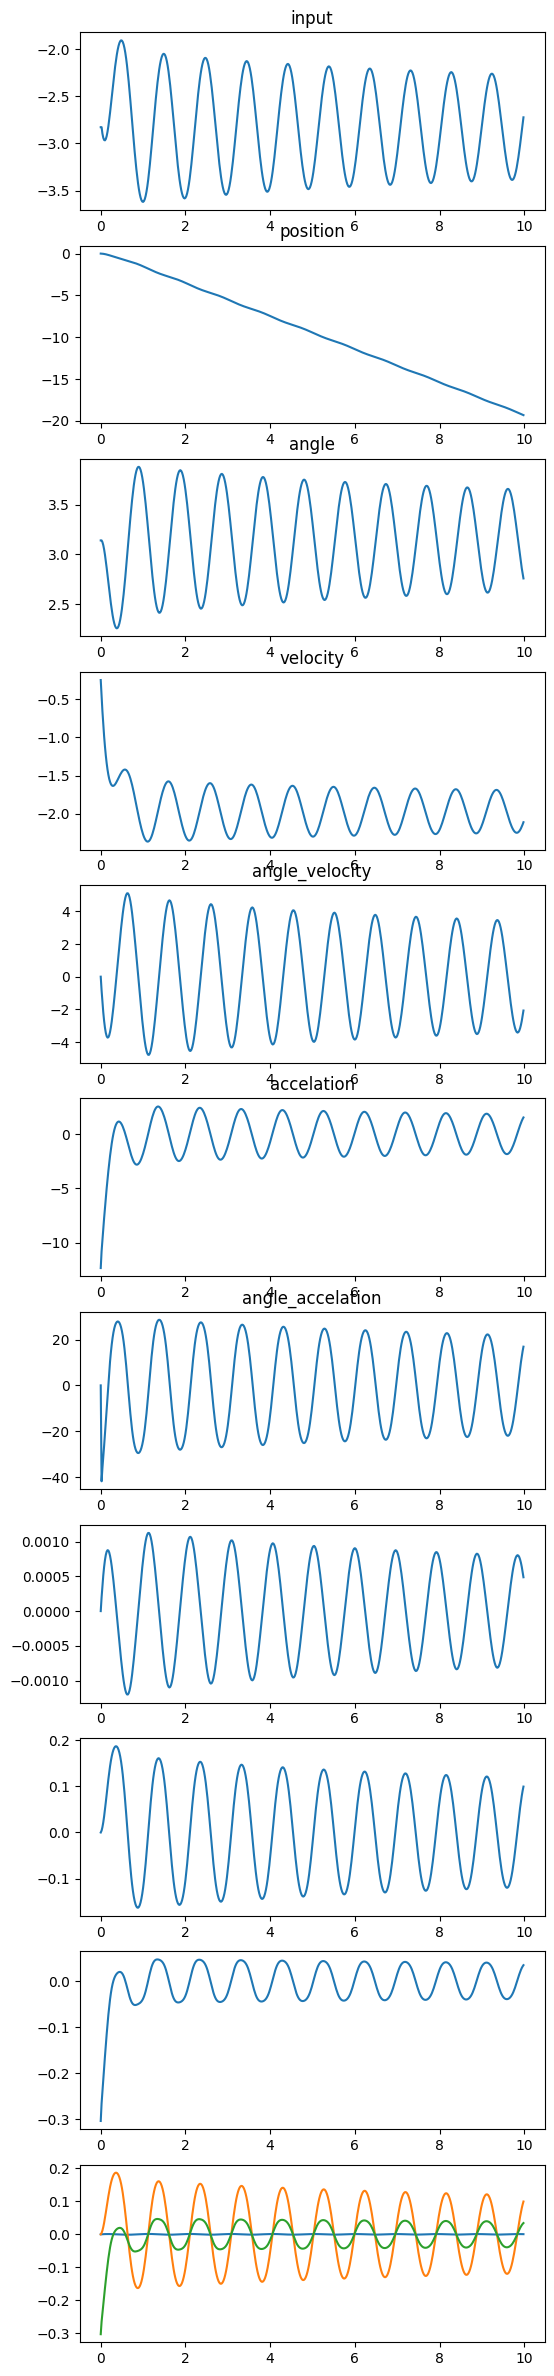

In [9]:
#variable
q = q0     #angle
dq = dq0  #angular velocity
z = z0    #position
dz = dz0  #velocity
ddz = 0.0

#v=0.0      #External input

p = []
vp = []
ap = []
angle_p = []
angle_vp = []
angle_ap = []
kp = 0.9
ki = 0.1
pq = 0.0
pz = 0.0
h = 0.02  #width
t = np.arange(0,10,h)
a = []
b = []
c = []
inp = []

for _ in t:
  v = P_function(kp,ki,pz,z,pq,q,dq)
  inp.append(v)
  p.append(z)
  angle_p.append(q)
  z,q,dz,dq,ddz,ddq = answer(z,q,dz,dq,ddz,v)
  a.append(-mu_p*dq)
  b.append(m_p*g*l_p*np.sin(q))
  c.append(-m_p*l_p*np.cos(q)*ddz)
  vp.append(dz)
  angle_vp.append(dq)
  ap.append(ddz)
  angle_ap.append(ddq)

fig = plt.figure(figsize=(6,30))
ax1 = fig.add_subplot(11,1,1)
ax1.plot(t,inp)
ax1.set_title('input')
ax2 = fig.add_subplot(11,1,2)
ax2.plot(t,p)
ax2.set_title('position')
ax3 = fig.add_subplot(11,1,3)
ax3.plot(t,angle_p)
ax3.set_title('angle')
zero = [t[i] for i in range(len(angle_p)) if abs(angle_p[i]) < 0.01 ]
if len(zero) != 0:
    ax3.vlines(zero[0], -3, 3,color='r', linestyles='dotted')
ax4 = fig.add_subplot(11,1,4)
ax4.plot(t,vp)
ax4.set_title('velocity')
ax5 = fig.add_subplot(11,1,5)
ax5.plot(t,angle_vp)
ax5.set_title('angle_velocity')
if len(zero) != 0:
    ax5.vlines(zero[0], -10, 3,color='r', linestyles='dotted')
ax6 = fig.add_subplot(11,1,6)
ax6.plot(t,ap)
ax6.set_title('accelation')
ax7 = fig.add_subplot(11,1,7)
ax7.plot(t,angle_ap)
ax7.set_title('angle_accelation')
if len(zero) != 0:
    ax7.vlines(zero[0], -100, 3,color='r', linestyles='dotted')
ax8 = fig.add_subplot(11,1,8)
ax8.plot(t,a)
ax9 = fig.add_subplot(11,1,9)
ax9.plot(t,b)
ax10 = fig.add_subplot(11,1,10)
ax10.plot(t,c)
ax11 = fig.add_subplot(11,1,11)
ax11.plot(t,a)
ax11.plot(t,b)
ax11.plot(t,c)
plt.show()

## 2. データ収集　ランダムな初期値からランダムな制御入力

In [34]:
h = 0.02
def sampling(dz,z,dq,q):
  v = P_function(kp,ki,pz,z,pq,q,dq)
  ddz = Calculate_ddz(dz,v)
  dz += ddz * h
  z += dz * h
  ddq = Calculate_ddq(dq, q, ddz)
  dq += ddq * h
  q += dq * h
  q = radian(q)
  return v,z,q,

In [35]:
def random_sampling():
  q = np.random.uniform(-np.pi,np.pi)
  dq = np.random.uniform(-10.0,10.0)
  z = np.random.uniform(-1.0,1.0)
  dz = np.random.uniform(-3.0,3.0)
  return sampling(dz,z,dq,q)

In [36]:
np.random.seed(0)
times = 1000
data = []
sample_times = np.arange(0,times)

for _ in sample_times:
  data.append(random_sampling())
np.savetxt("sample.csv",            # ファイル名
           X=data,                  # 保存したい配列
           delimiter=","            # 区切り文字
)

## 3. データ収集　指定された初期状態からランダムな制御入力

### 初期値

In [13]:
#initial
q0 = np.pi
dq0 = 0
z0 = 0
dz0 = 0

In [14]:
def initial_sampling():
  q0 = np.pi
  dq0 = 0.0
  z0 = 0.0
  dz0 = 0.0
  return sampling(dz,z,dq,q)

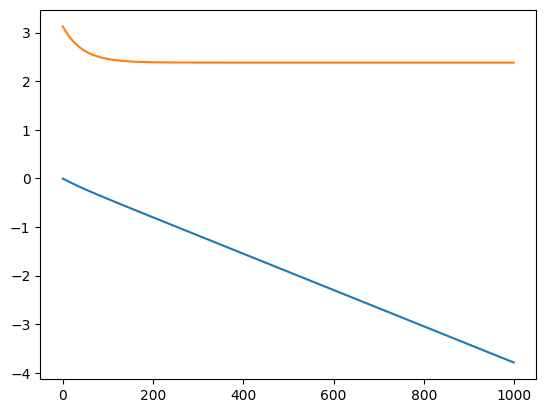

In [15]:
np.random.seed(0)
times = 1000
sample_z = []
sample_q = []
sample_times = np.arange(0,times)

#variable
q = q0     #angle
dq = dq0  #angular velocity
z = z0    #position
dz = dz0  #velocity

for _ in sample_times:
  v,z,q = initial_sampling()
  sample_z.append(z)
  sample_q.append(q)

plt.plot(sample_times,sample_z)
plt.plot(sample_times,sample_q)
plt.show()

##　４. MLPを訓練

# Answer

In [16]:
h = 0.02
def answer(z,q,dz,dq,ddz,v):
  ddq = Calculate_ddq(dq, q, ddz)
  dq += ddq * h
  q += dq * h
  ddz = Calculate_ddz(dz,v)
  dz += ddz * h
  z += dz * h
  #q = radian(q)
  return z,q,dz,dq,ddz,ddq

In [17]:
contrl = np.genfromtxt('opt_ctrl.csv')

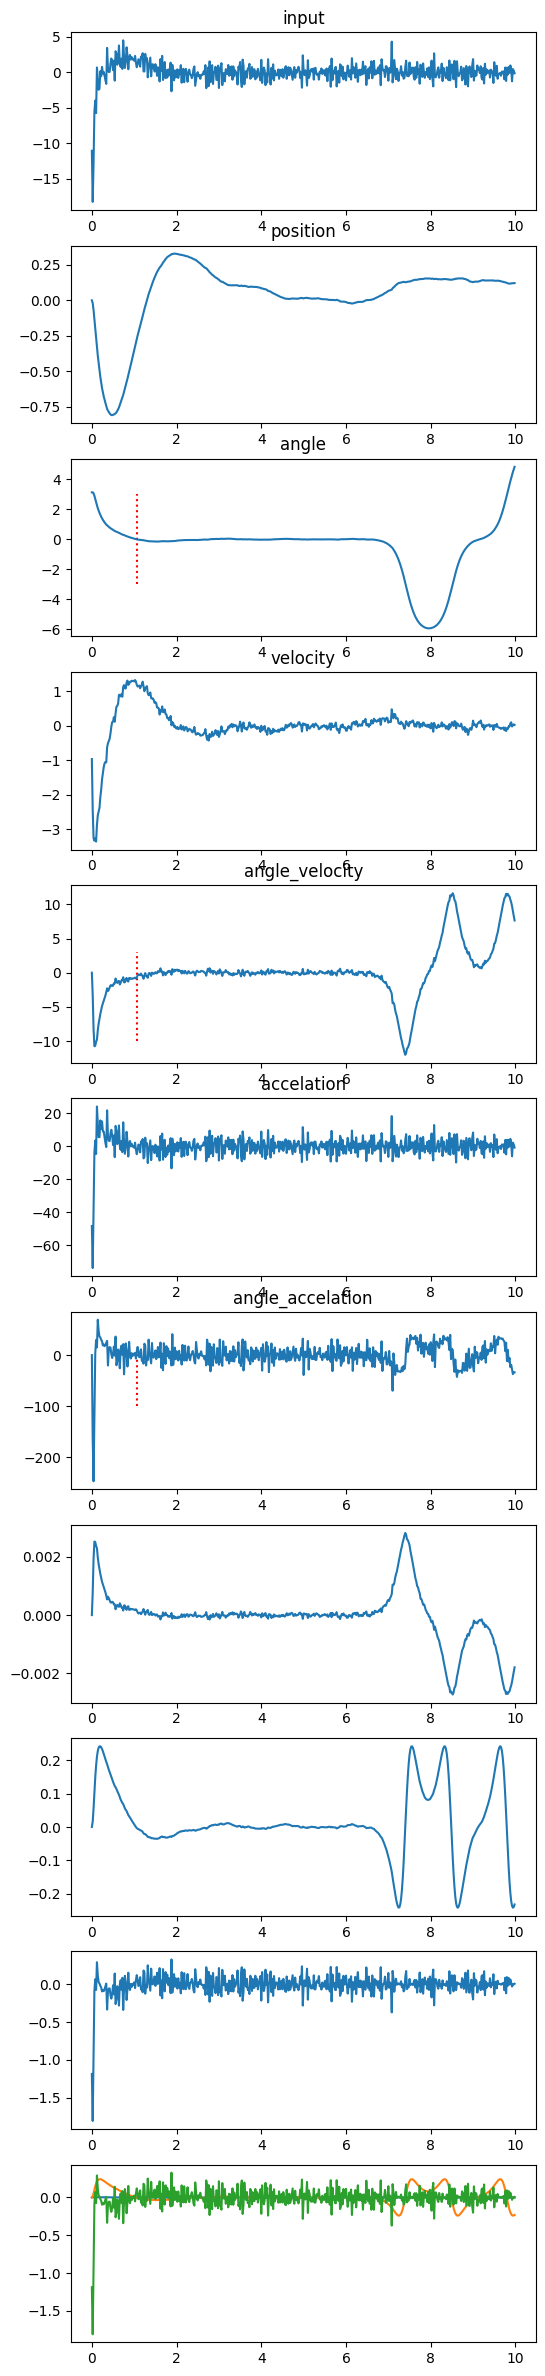

In [18]:
#variable
q = q0     #angle
dq = dq0  #angular velocity
z = z0    #position
dz = dz0  #velocity
ddz = 0.0

#v=0.0      #External input

p = []
vp = []
ap = []
angle_p = []
angle_vp = []
angle_ap = []
kp = 0.8
pq = np.pi
h = 0.02  #width
t = np.arange(0,10,h)
a = []
b = []
c = []

for v in contrl:
  p.append(z)
  angle_p.append(q)
  z,q,dz,dq,ddz,ddq = answer(z,q,dz,dq,ddz,v)
  a.append(-mu_p*dq)
  b.append(m_p*g*l_p*np.sin(q))
  c.append(-m_p*l_p*np.cos(q)*ddz)
  vp.append(dz)
  angle_vp.append(dq)
  ap.append(ddz)
  angle_ap.append(ddq)

fig = plt.figure(figsize=(6,30))
ax1 = fig.add_subplot(11,1,1)
ax1.plot(t,contrl)
ax1.set_title('input')
ax2 = fig.add_subplot(11,1,2)
ax2.plot(t,p)
ax2.set_title('position')
ax3 = fig.add_subplot(11,1,3)
ax3.plot(t,angle_p)
ax3.set_title('angle')
zero = [t[i] for i in range(len(angle_p)) if abs(angle_p[i]) < 0.01 ]
if len(zero) != 0:
    ax3.vlines(zero[0], -3, 3,color='r', linestyles='dotted')
ax4 = fig.add_subplot(11,1,4)
ax4.plot(t,vp)
ax4.set_title('velocity')
ax5 = fig.add_subplot(11,1,5)
ax5.plot(t,angle_vp)
ax5.set_title('angle_velocity')
if len(zero) != 0:
    ax5.vlines(zero[0], -10, 3,color='r', linestyles='dotted')
ax6 = fig.add_subplot(11,1,6)
ax6.plot(t,ap)
ax6.set_title('accelation')
ax7 = fig.add_subplot(11,1,7)
ax7.plot(t,angle_ap)
ax7.set_title('angle_accelation')
if len(zero) != 0:
    ax7.vlines(zero[0], -100, 3,color='r', linestyles='dotted')
ax8 = fig.add_subplot(11,1,8)
ax8.plot(t,a)
ax9 = fig.add_subplot(11,1,9)
ax9.plot(t,b)
ax10 = fig.add_subplot(11,1,10)
ax10.plot(t,c)
ax11 = fig.add_subplot(11,1,11)
ax11.plot(t,a)
ax11.plot(t,b)
ax11.plot(t,c)
plt.show()


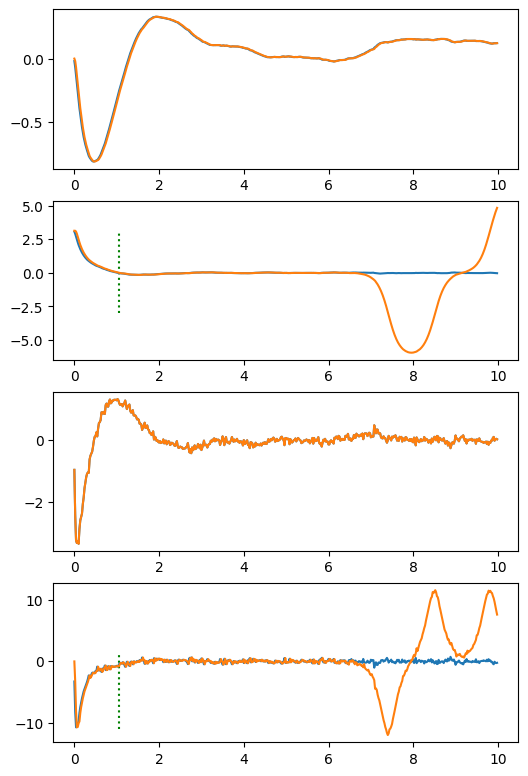

-0.0016693870515805398 0.01735129809341801 -0.16693870515805273 0.8675649046648366
-0.0007166165609623354 0.013270035695105889 -0.07166165609623111 0.6635017847484868
-0.00199452133997452 0.01240673215643251 -0.19945213399745154 0.6203366078139855
-0.0012983775995564772 0.012575379343806481 -0.12983775995564634 0.6287689671817481
-0.0016065249688643757 0.009628578024013117 -0.16065249688643923 0.48142890119103227
0.00035903804442671827 0.002507758567611651 0.03590380444267269 0.12538792836978327
-0.002227392003286255 0.003146125598361929 -0.22273920032862507 0.1573062799059822
-0.0014791267270989339 0.00795147029997309 -0.14791267270989117 0.39757351498505916
-0.00041275778577948286 0.0004786699009459647 -0.041275778577948855 0.023933495032043756
-0.002792820353325509 0.0036223050539869323 -0.27928203533254853 0.18111525268223394
-0.0018217942384265995 0.007134793355860432 -0.18217942384266234 0.3567396677738174
-0.0007459897479819011 -0.0009769490017935145 -0.07459897479818861 -0.0488

In [19]:
parameter = np.genfromtxt('opt_state.csv')
t = np.arange(0,10,h)
fig = plt.figure(figsize=(6,12))
ax1 = fig.add_subplot(5,1,1)
ax1.plot(t,parameter.transpose()[0])
ax1.plot(t,p)
ax2 = fig.add_subplot(5,1,2)
ax2.plot(t,parameter.transpose()[1])
ax2.plot(t,angle_p)
zero = [t[i] for i in range(len(angle_p)) if abs(angle_p[i]) < 0.01 ]
if len(zero) != 0:
    ax2.vlines(zero[0], -3, 3,color='g', linestyles='dotted')
ax3 = fig.add_subplot(5,1,3)
ax3.plot(t,parameter.transpose()[2])
ax3.plot(t,vp)
ax4 = fig.add_subplot(5,1,4)
ax4.plot(t,parameter.transpose()[3])
ax4.plot(t,angle_vp)
if len(zero) != 0:
    ax4.vlines(zero[0], -11, 1,color='g', linestyles='dotted')
plt.show()
for i in range(100,200):
    print(parameter[i][0]-p[i],parameter[i][1]-angle_p[i],parameter[i][2]+vp[i],parameter[i][3]+angle_vp[i])

## 5. データ量とフィッティング精度

## 6. コスト関数の最小化する軌道周囲の予測精度

### コスト関数

In [20]:
def loss_cost(ddq,dq,q,ddz,dz):
    return  10* dz**2 + 500*(-np.cos(q)+1)**2 + dz**2 + 15*dq**2
    #20*dz*ddz + 1000*np.sin(q)*(-np.cos(q)+1) + 2*dz*ddz +30*dq*ddq

### 実行

In [21]:
p = []
angle_p = []
input_s = []
h = 0.02  #width
t = np.arange(0,3,h)

#variable
q = q0     #angle
dq = dq0  #angular velocity
z = z0    #position
dz = dz0  #velocity
v=1 #External input
for _ in t:
  input_s.append(v)
  ddz = Calculate_ddz(dz,v)
  dz += ddz * h
  z += dz * h
  p.append(z)
  #print(z)
  #print(ddz)
  ddq = Calculate_ddq(dq, q, ddz)
  dq += ddq * h
  q += dq * h
  v = 0
  """if q > np.pi or q < np.pi:
    times = q // 2*np.pi
    if q > np.pi:
      q -= 2*np.pi * times
    elif q < -np.pi:
      q += 2*np.pi * times
 """
  angle_p.append(q)
  #print(ddq)

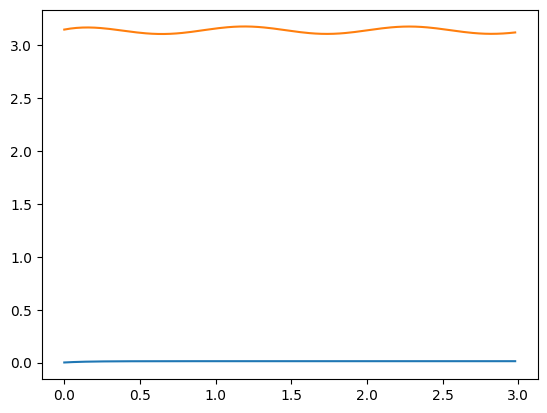

In [22]:
plt.plot(t,p)
plt.plot(t,angle_p)
#plt.plot(t,input_s)
plt.show()